In [2]:
!pip install transformers==4.49.0 accelerate==1.4.0 bitsandbytes==0.45.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 56.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 21.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.0
    Uninstalling transformers-4.47.0:
      Successfully uninstalled transformers-4.47.0
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1


In [1]:
import transformers
print(transformers.__version__)

4.47.0


In [1]:
!pip install together

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.4 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.


In [4]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("HF_TOKEN")
secret_value_1 = user_secrets.get_secret("TOGETHER_API_KEY")

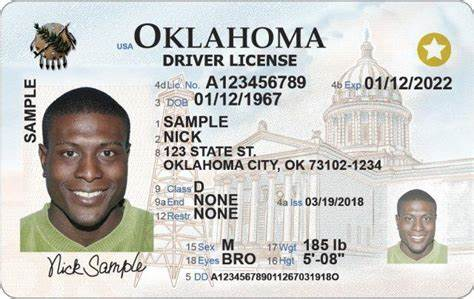

In [13]:
from IPython.display import Image, display, Markdown

# Provide the path to your image file
imageUrl = "/kaggle/input/d/prem1503/llama-ocr-testing/idcard.jpg"
display(Image(imageUrl))

In [14]:
###### from together import Together
import base64

client = Together(api_key=secret_value_1)
# getDescriptionPrompt = "You are a UX/UI designer. Describe the attached screenshot or UI mockup in detail. I will feed in the output you give me to a coding model that will attempt to recreate this mockup, so please think step by step and describe the UI in detail. Pay close attention to background color, text color, font size, font family, padding, margin, border, etc. Match the colors and sizes exactly. Make sure to mention every part of the screenshot including any headers, footers, etc. Use the exact text from the screenshot."

getDescriptionPrompt = """You are an amazing AI assistant who can extract text from an image. Descibe the given image. 
    So, from the given image by focusing on only the text extract it. if this text has names, date of birth and other similar details highlight them in your response"""

def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')

base64_image = encode_image(imageUrl)

stream = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": getDescriptionPrompt},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    stream=False,
)

Markdown(stream.choices[0].message.content)

The image shows a sample driver's license from Oklahoma. 

*   The license is light blue with a faint image of the Oklahoma state capitol building in the background.
*   The top of the license has "OKLAHOMA" in large black text, with "DRIVER LICENSE" underneath it.
*   Below that are several lines of text, including the person's name, date of birth, address, and other identifying information.
*   The license also includes a photo of the person, as well as their height, weight, and eye color.
*   The bottom of the license has a series of numbers and letters, which are likely the person's driver's license number.
*   The license also includes a signature line, where the person whose license this is would sign their name.

The text on the license includes:

*   **Name:** Sample Nick
*   **Date of Birth:** 01/12/1967
*   **Address:** 123 State St. Oklahoma City, OK 73102-1234
*   **ID Number:** A123456789
*   **Date of Expiration:** 01/12/2022
*   **Class:** D
*   **Endorsements:** None
*   **Restrictions:** None
*   **Sex:** M
*   **Eyes:** BRO
*   **Height:** 5'-08"
*   **Weight:** 185 lb

Overall, the license provides a range of personal and identifying information about the person whose license it is.

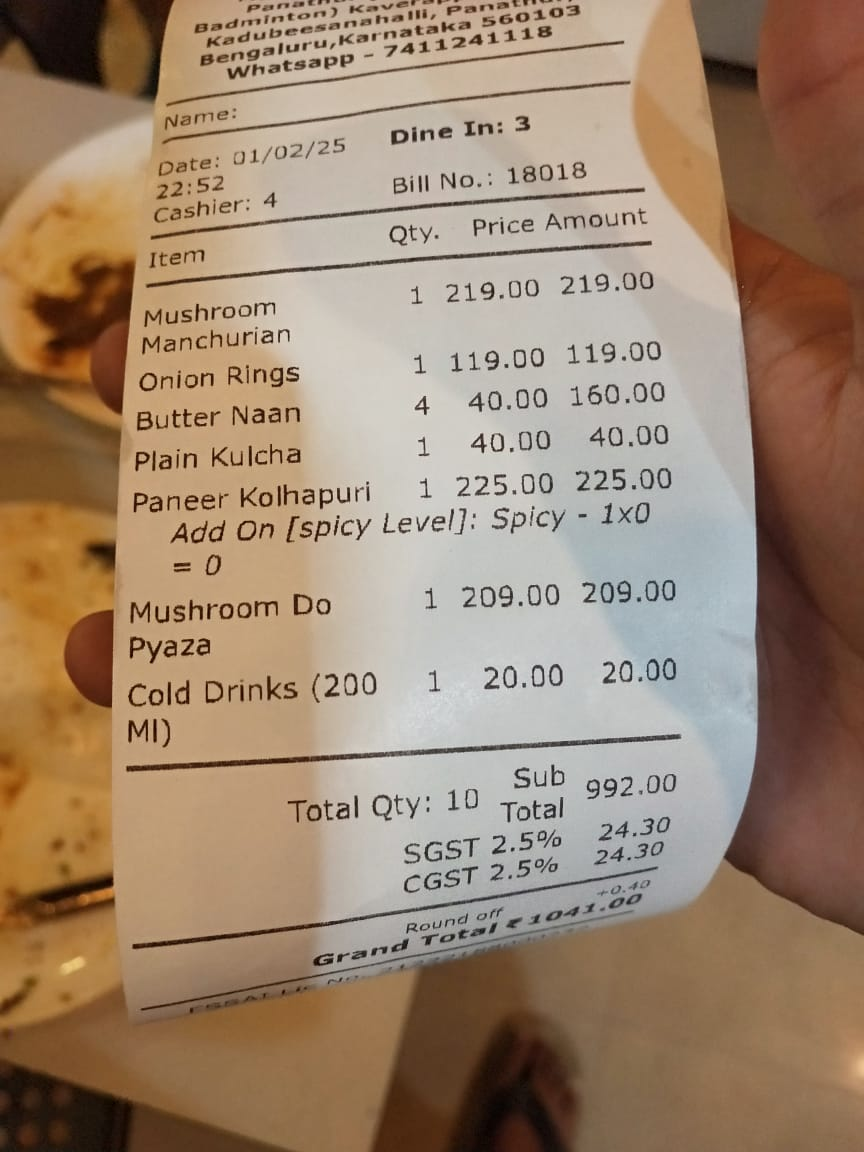

In [15]:
imageUrl = "/kaggle/input/d/prem1503/llama-ocr-testing/bill.jpeg"
display(Image(imageUrl))

In [17]:
base64_image = encode_image(imageUrl)

stream = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "extract from the image what are all the dishes that were ordered and how much does each cost. if they are other details in the image include them too but at the bottom"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    stream=False,
)

Markdown(stream.choices[0].message.content)

**Receipt Details**

* **Date:** 01/02/25
* **Time:** 22:52
* **Cashier:** 4
* **Table Number:** 3

**Ordered Items and Prices**

* **Mushroom Manchurian**: 1, Rs. 219.00
* **Onion Rings**: 1, Rs. 119.00
* **Butter Naan**: 4, Rs. 40.00
* **Plain Kulcha**: 1, Rs. 40.00
* **Paneer Kolhapuri**: 1, Rs. 225.00
	+ Add-on: Spicy Level, Rs. 1 x 0 = Rs. 0
* **Mushroom Do Pyaza**: 1, Rs. 209.00
* **Cold Drinks (200 ml)**: 1, Rs. 20.00

**Subtotal:** Rs. 992.00
**GST (2.5%):** Rs. 24.30
**CGST (2.5%):** Rs. 24.30
**Total:** Rs. 1041.00

**Note:** The image shows a receipt for a meal at a restaurant, with a total cost of Rs. 1041.00. The receipt includes details such as the date, time, cashier number, table number, and a list of ordered items with their corresponding prices. The subtotal is Rs. 992.00, and the GST and CGST amounts are Rs. 24.30 each, totaling Rs. 48.60. The grand total is Rs. 1041.00. The receipt also includes a note at the bottom stating "Round off" and "Grand Total".

In [26]:
from together import Together
client = Together(api_key=secret_value_1)
messages = [
    {
            "role": "user",
            "content" : [{
                "type":"text",
                "text": "what is calculus?"
            }]
    }
]
response = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=messages
)


In [27]:
response_text = response.choices[0].message.content
response_text

'Calculus is a branch of mathematics that deals with the study of continuous change, particularly in the context of functions and limits. It is a fundamental subject that has numerous applications in various fields, including physics, engineering, economics, and computer science.\n\n**What does calculus involve?**\n\nCalculus is divided into two main branches:\n\n1. **Differential Calculus**: This branch deals with the study of rates of change and slopes of curves. It involves the concept of limits, derivatives, and differentials, which are used to analyze how functions change as their input changes.\n2. **Integral Calculus**: This branch deals with the study of accumulation of quantities, such as area and volume. It involves the concept of integrals, which are used to calculate the total amount of change of a function over a given interval.\n\n**Key concepts in calculus**\n\nSome of the key concepts in calculus include:\n\n* **Limits**: The concept of limits is used to define the beha

In [28]:
messages1 = messages.copy()
messages.append(
    {
        "role": "assistant",
        "content" : response_text
    }
)
messages.append(
    {
        "role": "user",
        "content" : [
            {
                "type": "text", 
                "text":"can you elaborate on the physics part from your above response"
            }
        ]
    }
)
messages

[{'role': 'user', 'content': [{'type': 'text', 'text': 'what is calculus?'}]},
 {'role': 'assistant',
  'content': 'Calculus is a branch of mathematics that deals with the study of continuous change, particularly in the context of functions and limits. It is a fundamental subject that has numerous applications in various fields, including physics, engineering, economics, and computer science.\n\n**What does calculus involve?**\n\nCalculus is divided into two main branches:\n\n1. **Differential Calculus**: This branch deals with the study of rates of change and slopes of curves. It involves the concept of limits, derivatives, and differentials, which are used to analyze how functions change as their input changes.\n2. **Integral Calculus**: This branch deals with the study of accumulation of quantities, such as area and volume. It involves the concept of integrals, which are used to calculate the total amount of change of a function over a given interval.\n\n**Key concepts in calculus**

In [29]:
response1 = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=messages
)

In [30]:
response_text1 = response1.choices[0].message.content
response_text1

"Let's dive deeper into the physics aspect of calculus.\n\n**Calculus in Physics: A Fundamental Tool**\n\nCalculus is a fundamental tool in physics, used to describe the behavior of physical systems, from the smallest subatomic particles to the entire universe. Calculus helps physicists model complex phenomena, make predictions, and understand the underlying laws of nature.\n\n**Applications of Calculus in Physics**\n\nSome of the key applications of calculus in physics include:\n\n1. **Motion and Kinematics**: Calculus is used to describe the motion of objects, including their position, velocity, and acceleration. The derivative of a function represents the rate of change of an object's position, while the integral represents the total distance traveled.\n2. **Work and Energy**: Calculus is used to calculate the work done by a force on an object, as well as the energy transferred between objects.\n3. **Momentum and Collisions**: Calculus is used to calculate the momentum of an object,

In [31]:
messages1

[{'role': 'user', 'content': [{'type': 'text', 'text': 'what is calculus?'}]}]